# 收集数据和预处理
## 数据可视化

In [ ]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas 
df_app = pd.read_csv('app.csv', index_col='Date', parse_dates=['Date']) #导入数据
df_app #显示数据

,Activation
Date,
2019-01-01,419
2019-01-02,432
2019-01-03,436
2019-01-04,439
2019-01-05,439


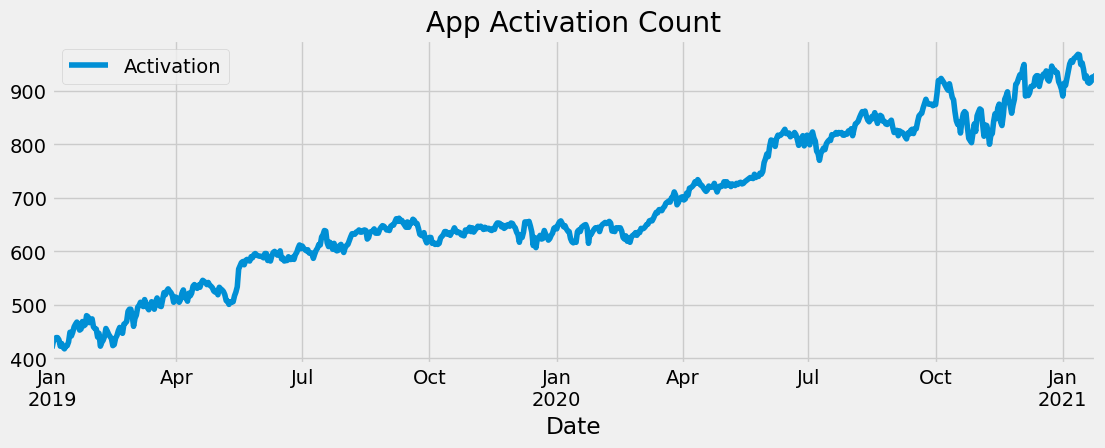

In [2]:
import matplotlib.pyplot as plt #导入matplotlib.pyplot
plt.style.use('fivethirtyeight') #设定绘图风格
df_app["Activation"].plot(figsize=(12,4),legend=True) #绘制激活数
plt.title('App Activation Count') #图题
plt.show() #绘图

## 数据清洗

In [6]:
df_app.dropna()
(df_app.Activation < 0).values.any() #有负值吗？

False

## 拆分训练集和测试集

In [7]:
# 按照2020年10月1日为界拆分数据集
Train = df_app[:'2020-09-30'].iloc[:,0:1].values #训练集
Test = df_app['2020-10-01':].iloc[:,0:1].values #测试集

In [8]:
Train #显示训练集对象

array([[419],
       [432],
       [436],
       [439],
       [439],
       [435],
       [423],
       [428],
       [421],
       [418],
       [423],
       [424],
       [431],
       [449],
       [442],
       [449],
       [459],
       [464],
       [468],
       [461],
       [453],
       [455],
       [469],
       [461],
       [463],
       [480],
       [478],
       [467],
       [472],
       [474],
       [459],
       [456],
       [455],
       [440],
       [447],
       [423],
       [430],
       [434],
       [441],
       [456],
       [451],
       [445],
       [441],
       [437],
       [424],
       [426],
       [438],
       [443],
       [452],
       [458],
       [456],
       [447],
       [464],
       [466],
       [469],
       [488],
       [492],
       [492],
       [480],
       [460],
       [475],
       [481],
       [496],
       [499],
       [505],
       [501],
       [497],
       [510],
       [501],
       [495],
       [491],
      

In [9]:
print('训练集的形状是：', Train.shape)
print('测试集的形状是：', Test.shape)

训练集的形状是： (639, 1)
测试集的形状是： (117, 1)


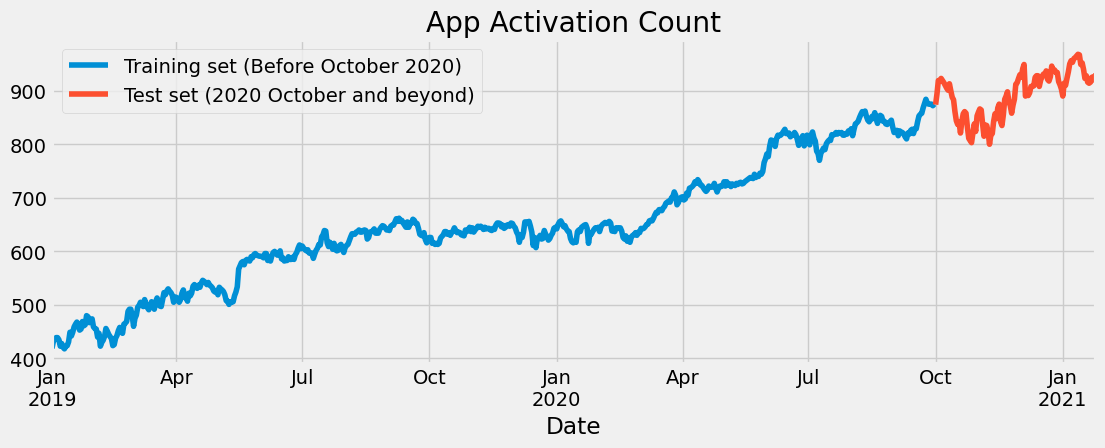

In [10]:
# 以不同颜色为训练集和测试集绘图
df_app["Activation"][:'2020-09-30'].plot(figsize=(12,4),legend=True) #训练集
df_app["Activation"]['2020-10-01':].plot(figsize=(12,4),legend=True) #测试集
plt.legend(['Training set (Before October 2020)','Test set (2020 October and beyond)']) #图例
plt.title('App Activation Count') #图题
plt.show() #绘图

## 特征工程

In [11]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
Scaler = MinMaxScaler(feature_range=(0,1)) #创建缩放器
Train = Scaler.fit_transform(Train) #拟合缩放器并对训练集进行归一化

## 构建特征集和标签集

In [ ]:
# 创建具有 60 个时间步长和 1 个输出的数据结构
X_train = [] #初始化
y_train = [] #初始化
for i in range(60,Train.size): 
    X_train.append(Train[i-60:i,0]) #构建特征
    y_train.append(Train[i,0]) #构建标签
X_train, y_train = np.array(X_train), np.array(y_train) #转换为NumPy数组
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) #转换成神经网络所需的张量形状

In [16]:
print(X_train.shape)
print(y_train.shape)

(579, 60, 1)
(579,)


In [15]:
X_train

array([[[0.00214592],
        [0.03004292],
        [0.03862661],
        ...,
        [0.15879828],
        [0.13304721],
        [0.09012876]],

       [[0.03004292],
        [0.03862661],
        [0.04506438],
        ...,
        [0.13304721],
        [0.09012876],
        [0.1223176 ]],

       [[0.03862661],
        [0.04506438],
        [0.04506438],
        ...,
        [0.09012876],
        [0.1223176 ],
        [0.13519313]],

       ...,

       [[0.87339056],
        [0.86909871],
        [0.88197425],
        ...,
        [0.98497854],
        [0.9806867 ],
        [0.9806867 ]],

       [[0.86909871],
        [0.88197425],
        [0.85407725],
        ...,
        [0.9806867 ],
        [0.9806867 ],
        [0.9806867 ]],

       [[0.88197425],
        [0.85407725],
        [0.87982833],
        ...,
        [0.9806867 ],
        [0.9806867 ],
        [0.97424893]]])

In [17]:
TrainTest = df_app["Activation"][:] #整体数据
inputs = TrainTest[len(TrainTest)-len(Test) - 60:].values #Test加上前60个时间步
inputs = inputs.reshape(-1,1) #转换形状
inputs  = Scaler.transform(inputs) #归一化
# 创建具有 60 个时间步长和 1 个输出的数据结构 - 测试集
X_test = [] #初始化
y_test = [] #初始化
for i in range(60,inputs.size): 
    X_test.append(inputs[i-60:i,0]) #构建特征
    y_test.append(inputs[i,0]) #构建标签
X_test = np.array(X_test) #转换为NumPy数组
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1)) #转换成神经网络所需的张量形状

# 选择算法并建立模型

In [ ]:
from tensorflow.keras import layers # 导入所有层 行1
from tensorflow.keras.models import Sequential #导入序贯模型
from tensorflow.keras.layers import Dense, LSTM #导入全连接层和LSTM层
# LSTM网络架构
RNN_LSTM = Sequential() #序贯模型
RNN_LSTM.add(layers.Input(shape=(X_train.shape[1],1)))
RNN_LSTM.add(LSTM(units=50, return_sequences=True)) #输入层LSTM,return_sequences返回输出序列
RNN_LSTM.add(LSTM(units=50, return_sequences=True)) #中间1层LSTM，return_sequences返回输出序列
RNN_LSTM.add(LSTM(units=50, return_sequences=True)) #中间2层LSTM，return_sequences返回输出序列
RNN_LSTM.add(LSTM(units=50)) #中间3层LSTM
RNN_LSTM.add(Dense(units=1)) #输出层Dense
# 编译网络
RNN_LSTM.compile(loss='mse', #损失函数
                 optimizer='rmsprop', #优化器
                 metrics=['mae']) #评估指标
RNN_LSTM.summary() #输出神经网络结构信息

2026-01-18 20:57:41.236811: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2026-01-18 20:57:41.237031: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-01-18 20:57:41.237036: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2026-01-18 20:57:41.237256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-18 20:57:41.237293: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = RNN_LSTM.fit(X_train, y_train, epochs=50, validation_split=0.2) # 训练并保存训练历史信息

Epoch 1/50


2026-01-18 21:00:42.138661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - loss: 0.0331 - mae: 0.1235 - val_loss: 0.0341 - val_mae: 0.1792
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0071 - mae: 0.0669 - val_loss: 0.0110 - val_mae: 0.0950
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0066 - mae: 0.0655 - val_loss: 0.0845 - val_mae: 0.2872
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0049 - mae: 0.0561 - val_loss: 0.0328 - val_mae: 0.1753
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0074 - mae: 0.0729 - val_loss: 0.0046 - val_mae: 0.0559
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0053 - mae: 0.0596 - val_loss: 0.0171 - val_mae: 0.1228
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0061 - mae: 0.0603 - val_loss: 0.0049 - val_mae: 0.0584
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0042 - mae: 0.0520 - val_loss: 0.0517 - val_mae: 0.2229
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0057 - mae: 

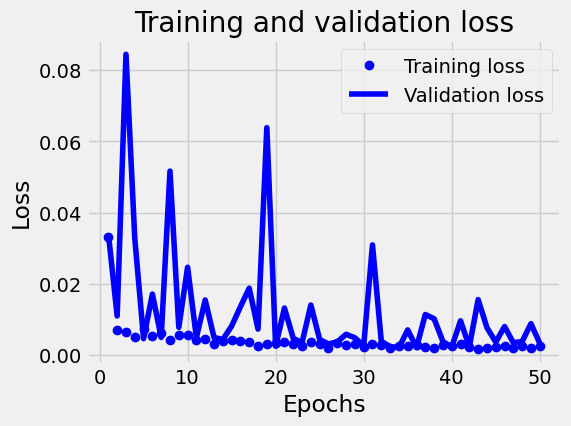

In [25]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss'] #训练损失
    val_loss = history.history['val_loss'] #验证损失
    epochs = range(1, len(loss) + 1) #训练轮次
    plt.figure(figsize=(12,4)) # 图片大小
    plt.subplot(1, 2, 1) #子图1
    plt.plot(epochs, loss, 'bo', label='Training loss') #训练损失
    plt.plot(epochs, val_loss, 'b', label='Validation loss') #验证损失
    plt.title('Training and validation loss') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Loss') #Y轴文字
    plt.legend() #图例
    plt.show() #绘图
show_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


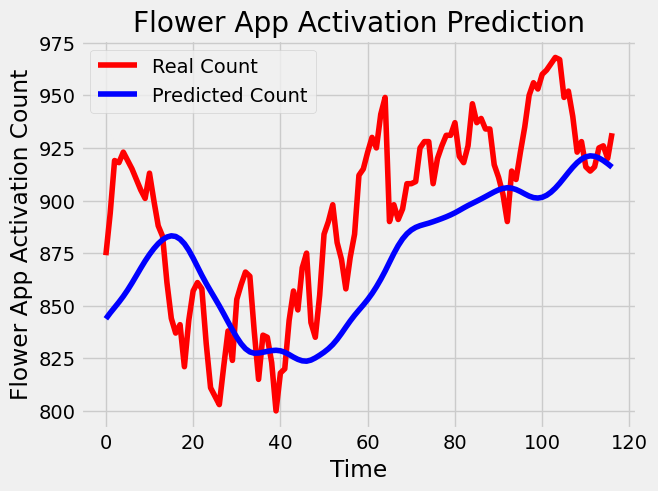

In [27]:
# 定义绘图函数
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Count') #真值
    plt.plot(predicted, color='blue',label='Predicted Count') #预测值
    plt.title('Flower App Activation Prediction') #图题
    plt.xlabel('Time') #X轴时间
    plt.ylabel('Flower App Activation Count') #Y轴激活数
    plt.legend() #图例
    plt.show() #绘图

predicted_stock_price = RNN_LSTM.predict(X_test) #预测
predicted_stock_price = Scaler.inverse_transform(predicted_stock_price) #反归一化
plot_predictions(Test, predicted_stock_price) #绘图